In [1]:
import pandas as pd

#variable path to contain directory with Yelp data
path = 'C:/Users/btada/Dropbox/Wake Tech/BAS 250/Lab_2/'

In [2]:
bus1 = pd.read_csv(path+'yelp_business.csv')

In [3]:
bus1.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


In [4]:
#examine variable types of dataset
bus1.dtypes

business_id      object
name             object
neighborhood     object
address          object
city             object
state            object
postal_code      object
latitude        float64
longitude       float64
stars           float64
review_count      int64
is_open           int64
categories       object
dtype: object

In [5]:
#How many rows and columns are in the DataFrame?
bus1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174567 entries, 0 to 174566
Data columns (total 13 columns):
business_id     174567 non-null object
name            174567 non-null object
neighborhood    68015 non-null object
address         174567 non-null object
city            174566 non-null object
state           174566 non-null object
postal_code     173944 non-null object
latitude        174566 non-null float64
longitude       174566 non-null float64
stars           174567 non-null float64
review_count    174567 non-null int64
is_open         174567 non-null int64
categories      174567 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 17.3+ MB


Las Vegas     26775
Phoenix       17213
Toronto       17206
Charlotte      8553
Scottsdale     8228
Name: city, dtype: int64

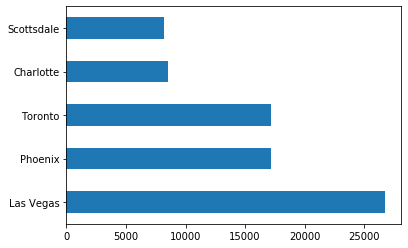

In [7]:
#What are the top 5 cities by record count?
bus1.city.value_counts()[:5].plot(kind='barh')

bus1.city.value_counts()[:5]

In [8]:
#subset the DataFrame to only include records where city = Charlotte
char_bus1 = bus1[bus1.city == 'Charlotte'].copy()

In [9]:
char_bus1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8553 entries, 14 to 174503
Data columns (total 13 columns):
business_id     8553 non-null object
name            8553 non-null object
neighborhood    5844 non-null object
address         8553 non-null object
city            8553 non-null object
state           8553 non-null object
postal_code     8517 non-null object
latitude        8553 non-null float64
longitude       8553 non-null float64
stars           8553 non-null float64
review_count    8553 non-null int64
is_open         8553 non-null int64
categories      8553 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 935.5+ KB


In [10]:
char_bus1.dtypes

business_id      object
name             object
neighborhood     object
address          object
city             object
state            object
postal_code      object
latitude        float64
longitude       float64
stars           float64
review_count      int64
is_open           int64
categories       object
dtype: object

In [11]:
#keeping only specified columns
char_bus1 = char_bus1[['business_id', 'name', 'neighborhood', 'postal_code', 'latitude', 'longitude', 'is_open', 'categories']]

#renaming name to business name
char_bus1 = char_bus1.rename(columns={'name' : 'business_name'})

In [12]:
#checking new dataset
char_bus1.head()

,business_id,business_name,neighborhood,postal_code,latitude,longitude,is_open,categories
14,fNMVV_ZX7CJSDWQGdOM8Nw,"""Showmars Government Center""",Uptown,28202,35.221647,-80.839345,1,Restaurants;American (Traditional)
56,ykJM7EuGziATZ5u2qIT08g,"""My Fitness World""",South End,28203,35.220211,-80.855785,1,Active Life;Fitness & Instruction;Gyms
77,NFTh6mj3X2AnHJCKIFUk5Q,"""Fairfield Inn & Suites""",NaN,28105,35.147422,-80.726487,1,Hotels;Event Planning & Services;Hotels & Travel
84,nJ3mXjItS8WcwhYbzbfDQw,"""Scott's Karat Patch""",South Park,28209,35.160889,-80.849260,1,Watch Repair;Jewelry Repair;Shopping;Local Ser...
97,HAX1zec191t7QkT2sBZ76A,"""La Isla Cuban Restaurant""",NaN,28270,35.137223,-80.734594,0,Restaurants;Cuban


In [13]:
rev1 = pd.read_csv(path + 'yelp_review.csv', nrows=100)
rev1.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0


In [14]:
#reviewing the entire value of particular cell
rev1.text[0]

"Super simple place but amazing nonetheless. It's been around since the 30's and they still serve the same thing they started with: a bologna and salami sandwich with mustard. \n\nStaff was very helpful and friendly."

In [15]:
#how many characters does this cell contain?
len(rev1.text[0])

213

In [16]:
#changing to review cell 1
rev1.text[1]

"Small unassuming place that changes their menu every so often. Cool decor and vibe inside their 30 seat restaurant. Call for a reservation. \n\nWe had their beef tartar and pork belly to start and a salmon dish and lamb meal for mains. Everything was incredible! I could go on at length about how all the listed ingredients really make their dishes amazing but honestly you just need to go. \n\nA bit outside of downtown montreal but take the metro out and it's less than a 10 minute walk from the station."

In [18]:
#how many characters does cell 1 contain?
len(rev1.text[1])

502

In [19]:
#changing to review cell 2
rev1.text[2]

"Lester's is located in a beautiful neighborhood and has been there since 1951. They are known for smoked meat which most deli's have but their brisket sandwich is what I come to montreal for. They've got about 12 seats outside to go along with the inside. \n\nThe smoked meat is up there in quality and taste with Schwartz's and you'll find less tourists at Lester's as well."

In [20]:
#how many characters does cell 2 contain?
len(rev1.text[2])

373

In [26]:
#update read script to include usecols.  This allows us to call only certain columns we want
#we also will slowly increase the nrows value incrementally up to 10000
rev1 = pd.read_csv(path + 'yelp_review.csv', usecols=['review_id', 'user_id', 'business_id', 'stars', 'date'])
rev1.head()

,review_id,user_id,business_id,stars,date
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28


In [27]:
#run .shape to make sure that number of records does no equal the value put in nrows parameter
rev1.shape

(5261668, 5)

In [28]:
#creating users1 dataset using the yelp_user dataset
users1 = pd.read_csv(path + 'yelp_user.csv', usecols=['user_id','name', 'review_count' ,'average_stars', 'yelping_since'])

In [29]:
#running .shape on users1 
users1.shape

(1326100, 5)

In [30]:
#checking users1 using ,head()
users1.head()

,user_id,name,review_count,yelping_since,average_stars
0,JJ-aSuM4pCFPdkfoZ34q0Q,Chris,10,2013-09-24,3.70
1,uUzsFQn_6cXDh6rPNGbIFA,Tiffy,1,2017-03-02,2.00
2,mBneaEEH5EMyxaVyqS-72A,Mark,6,2015-03-13,4.67
3,W5mJGs-dcDWRGEhAzUYtoA,Evelyn,3,2016-09-08,4.67
4,4E8--zUZO1Rr1IBK4_83fg,Lisa,11,2012-07-16,3.45


In [31]:
#joining the charbus1 and rev1 datasets on business_id
char_rev1 = pd.merge(rev1, char_bus1, on='business_id')

In [32]:
#run ,shape to ensure that we have 237,308 rows and 12 columns
char_rev1.shape

(237308, 12)

In [33]:
#create char_rev2 by joining char_rev1 and users1 on user_id
char_rev2 = pd.merge(users1, char_rev1, on='user_id')

In [34]:
#run .shape to ensure char_rev2 has 237, 308 rows and 16 columns
char_rev2.shape

(237308, 16)

In [40]:
#run .dtypes to review the variable types 
char_rev2.dtypes

user_id                  object
name                     object
review_count              int64
yelping_since    datetime64[ns]
average_stars           float64
review_id                object
business_id              object
stars                     int64
date             datetime64[ns]
business_name            object
neighborhood             object
postal_code              object
latitude                float64
longitude               float64
is_open                   int64
categories               object
dtype: object

In [37]:
#change the varaible types of date and yelping since to datetime
char_rev2['date'] = pd.to_datetime(char_rev2['date'])
char_rev2['yelping_since'] = pd.to_datetime(char_rev2['yelping_since'])

In [39]:
#review a sample of the joined data
char_rev2.head()

,user_id,name,review_count,yelping_since,average_stars,review_id,business_id,stars,date,business_name,neighborhood,postal_code,latitude,longitude,is_open,categories
0,JJ-aSuM4pCFPdkfoZ34q0Q,Chris,10,2013-09-24,3.70,rCJcO4xS3kxjNTxpN8HPVA,Z5BHNFjt7ZmAse2kKlw2uA,3,2013-10-29,"""Bank of America Stadium""",Uptown,28202,35.226047,-80.853078,1,Professional Sports Teams;Stadiums & Arenas;Ar...
1,W5mJGs-dcDWRGEhAzUYtoA,Evelyn,3,2016-09-08,4.67,gGghNe3sGyxZdwCVdZ_njQ,gGt00WW8sNY2Sop7jYa7Tw,4,2017-07-28,"""Bakersfield East Blvd""",Dilworth,28203,35.202035,-80.844459,1,Tacos;Ethnic Food;Food;Cocktail Bars;Restauran...
2,H54pA7YHfjl8IjhHAfdXJA,Chad,3,2010-06-25,5.00,God09Xmyb03HSNVCkNkaQQ,2fE1irzYRjuP99P0Kxxnrg,5,2010-06-25,"""Nix Burger & Brew""",First Ward,28202,35.228133,-80.841470,0,Burgers;Restaurants
3,V--GjQPlTpeWbcB2cS06Gw,Cody,2,2017-10-24,3.00,mZVkbEOAe7ZvX5TVO9gjKg,1mb44krcyBOylDiyx_3ORg,5,2017-11-03,"""Firehouse Subs""",Starmount,28217,35.175854,-80.877768,1,Delis;Fast Food;Restaurants;Sandwiches
4,V--GjQPlTpeWbcB2cS06Gw,Cody,2,2017-10-24,3.00,0I7bVCcLBvRDQ-SuDy2gsA,HmGFMFsrwu7UhzGjtog9NQ,1,2017-11-24,"""IHOP""",NaN,28217,35.179577,-80.884007,1,Desserts;Sandwiches;American (New);Restaurants...


In [41]:
#remove all double qoutes from business name variable
char_rev2['business_name'] = char_rev2.business_name.str.strip('"')

In [43]:
#review top values for categories variable
char_rev2.categories.value_counts()[:5]

Restaurants;Mexican         2284
Mexican;Restaurants         1890
Hotels & Travel;Airports    1585
Chinese;Restaurants         1518
Food;Coffee & Tea           1461
Name: categories, dtype: int64

In [44]:
#lets look at only restaurants by using contains() method and create a new subset with this filter
char_rev3  = char_rev2[char_rev2.categories.str.contains('Restaurants')]

In [48]:
#compare char_rev2 and char_rev3
#char_rev2.head()

char_rev3.head()

,user_id,name,review_count,yelping_since,average_stars,review_id,business_id,stars,date,business_name,neighborhood,postal_code,latitude,longitude,is_open,categories
1,W5mJGs-dcDWRGEhAzUYtoA,Evelyn,3,2016-09-08,4.67,gGghNe3sGyxZdwCVdZ_njQ,gGt00WW8sNY2Sop7jYa7Tw,4,2017-07-28,Bakersfield East Blvd,Dilworth,28203,35.202035,-80.844459,1,Tacos;Ethnic Food;Food;Cocktail Bars;Restauran...
2,H54pA7YHfjl8IjhHAfdXJA,Chad,3,2010-06-25,5.00,God09Xmyb03HSNVCkNkaQQ,2fE1irzYRjuP99P0Kxxnrg,5,2010-06-25,Nix Burger & Brew,First Ward,28202,35.228133,-80.841470,0,Burgers;Restaurants
3,V--GjQPlTpeWbcB2cS06Gw,Cody,2,2017-10-24,3.00,mZVkbEOAe7ZvX5TVO9gjKg,1mb44krcyBOylDiyx_3ORg,5,2017-11-03,Firehouse Subs,Starmount,28217,35.175854,-80.877768,1,Delis;Fast Food;Restaurants;Sandwiches
4,V--GjQPlTpeWbcB2cS06Gw,Cody,2,2017-10-24,3.00,0I7bVCcLBvRDQ-SuDy2gsA,HmGFMFsrwu7UhzGjtog9NQ,1,2017-11-24,IHOP,NaN,28217,35.179577,-80.884007,1,Desserts;Sandwiches;American (New);Restaurants...
5,qWMB7hzUHO8Bln1rnRhaMw,M,3,2016-11-08,4.33,3dI5Ut8fFadwhY0TKImWMA,PdCxX1QJnlBkvnG9fFjWYg,4,2016-11-08,Sunflour Baking Company,Elizabeth,28204,35.212400,-80.817112,1,Food;Sandwiches;Coffee & Tea;Restaurants;Baker...


In [52]:
#count number of rows in char_rev3
print('Number of rows:', char_rev3.shape)

#find the number of unique values of review_id
print('Number of unique reviews:', char_rev3.review_id.nunique())

Number of rows: (156741, 16)
Number of unique reviews: 156741


In [53]:
#since the number of rows equals the number of unique values for review_id, we can set review_id as the index
char_rev3.set_index('review_id', inplace=True)

In [54]:
#review dataset to see that review_id is now in bold
char_rev3.head()

,user_id,name,review_count,yelping_since,average_stars,business_id,stars,date,business_name,neighborhood,postal_code,latitude,longitude,is_open,categories
review_id,,,,,,,,,,,,,,,
gGghNe3sGyxZdwCVdZ_njQ,W5mJGs-dcDWRGEhAzUYtoA,Evelyn,3,2016-09-08,4.67,gGt00WW8sNY2Sop7jYa7Tw,4,2017-07-28,Bakersfield East Blvd,Dilworth,28203,35.202035,-80.844459,1,Tacos;Ethnic Food;Food;Cocktail Bars;Restauran...
God09Xmyb03HSNVCkNkaQQ,H54pA7YHfjl8IjhHAfdXJA,Chad,3,2010-06-25,5.00,2fE1irzYRjuP99P0Kxxnrg,5,2010-06-25,Nix Burger & Brew,First Ward,28202,35.228133,-80.841470,0,Burgers;Restaurants
mZVkbEOAe7ZvX5TVO9gjKg,V--GjQPlTpeWbcB2cS06Gw,Cody,2,2017-10-24,3.00,1mb44krcyBOylDiyx_3ORg,5,2017-11-03,Firehouse Subs,Starmount,28217,35.175854,-80.877768,1,Delis;Fast Food;Restaurants;Sandwiches
0I7bVCcLBvRDQ-SuDy2gsA,V--GjQPlTpeWbcB2cS06Gw,Cody,2,2017-10-24,3.00,HmGFMFsrwu7UhzGjtog9NQ,1,2017-11-24,IHOP,NaN,28217,35.179577,-80.884007,1,Desserts;Sandwiches;American (New);Restaurants...
3dI5Ut8fFadwhY0TKImWMA,qWMB7hzUHO8Bln1rnRhaMw,M,3,2016-11-08,4.33,PdCxX1QJnlBkvnG9fFjWYg,4,2016-11-08,Sunflour Baking Company,Elizabeth,28204,35.212400,-80.817112,1,Food;Sandwiches;Coffee & Tea;Restaurants;Baker...


In [55]:
#remove the index
char_rev3.reset_index(inplace=True)

In [57]:
#view sample of dataset to notcie how the integers have now been reset, they no longer skip numbers
char_rev3.head()

,review_id,user_id,name,review_count,yelping_since,average_stars,business_id,stars,date,business_name,neighborhood,postal_code,latitude,longitude,is_open,categories
0,gGghNe3sGyxZdwCVdZ_njQ,W5mJGs-dcDWRGEhAzUYtoA,Evelyn,3,2016-09-08,4.67,gGt00WW8sNY2Sop7jYa7Tw,4,2017-07-28,Bakersfield East Blvd,Dilworth,28203,35.202035,-80.844459,1,Tacos;Ethnic Food;Food;Cocktail Bars;Restauran...
1,God09Xmyb03HSNVCkNkaQQ,H54pA7YHfjl8IjhHAfdXJA,Chad,3,2010-06-25,5.00,2fE1irzYRjuP99P0Kxxnrg,5,2010-06-25,Nix Burger & Brew,First Ward,28202,35.228133,-80.841470,0,Burgers;Restaurants
2,mZVkbEOAe7ZvX5TVO9gjKg,V--GjQPlTpeWbcB2cS06Gw,Cody,2,2017-10-24,3.00,1mb44krcyBOylDiyx_3ORg,5,2017-11-03,Firehouse Subs,Starmount,28217,35.175854,-80.877768,1,Delis;Fast Food;Restaurants;Sandwiches
3,0I7bVCcLBvRDQ-SuDy2gsA,V--GjQPlTpeWbcB2cS06Gw,Cody,2,2017-10-24,3.00,HmGFMFsrwu7UhzGjtog9NQ,1,2017-11-24,IHOP,NaN,28217,35.179577,-80.884007,1,Desserts;Sandwiches;American (New);Restaurants...
4,3dI5Ut8fFadwhY0TKImWMA,qWMB7hzUHO8Bln1rnRhaMw,M,3,2016-11-08,4.33,PdCxX1QJnlBkvnG9fFjWYg,4,2016-11-08,Sunflour Baking Company,Elizabeth,28204,35.212400,-80.817112,1,Food;Sandwiches;Coffee & Tea;Restaurants;Baker...


In [58]:
#review number of times each business name appears in the dataset
char_rev3.business_name.value_counts()

Amélie's French Bakery & Café    1926
Midwood Smokehouse               1465
The Cowfish Sushi Burger Bar     1345
Viva Chicken                     1186
Tupelo Honey                     1053
                                 ... 
Fox and Hound Smokehouse            3
Chennai Curries                     3
Maki of Japan                       3
Chin Garden                         3
Katz Deli                           3
Name: business_name, Length: 1802, dtype: int64

In [59]:
#now make this into a dataframe and assign it to new dataframe called review_count and reset the index
review_count = pd.DataFrame(char_rev3.business_name.value_counts())
review_count.reset_index(inplace=True)

In [62]:
#run group by user_id and assign this group to a new variable called group 1
group1 = char_rev3.groupby('user_id')
#char_rev3.groupby('user_id')

In [63]:
#run group1.mean()
group1.mean()

,review_count,average_stars,stars,latitude,longitude,is_open
user_id,,,,,,
--0RtXvcOIE4XbErYca6Rw,2.0,4.50,4.0,35.203507,-80.743549,0.0
--3WaS23LcIXtxyFULJHTA,214.0,3.91,4.0,35.223998,-80.876829,1.0
--5-MQZPsn2CJkyMFQkOgQ,6.0,3.67,5.0,35.156558,-80.824327,1.0
--6Ke7_lBBM6XAramtPoWw,16.0,4.44,4.5,35.137444,-80.808952,0.5
--DG6G_Q610kLar0JMwGkA,1.0,1.00,1.0,35.300040,-80.801808,1.0
...,...,...,...,...,...,...
zzg3bpldFxSyDJ4s1nMNvw,4.0,4.00,4.0,35.204245,-80.808777,1.0
zznOF_-TAaCRw1lRVQ9GzQ,68.0,3.43,3.0,35.215021,-80.856535,0.0
zzpGgInpynAC9do60jTAsg,1.0,5.00,5.0,35.228985,-80.839671,1.0


In [64]:
#to get an average of the stars variable for every user along with number of unique business each user has reviewed and assign it to new dataframe called users_agg
users_agg = group1.agg({'stars':'mean', 'business_id': 'nunique'})

In [65]:
#view a sample of new users_agg dataset
users_agg.head()

,stars,business_id
user_id,,
--0RtXvcOIE4XbErYca6Rw,4.0,1
--3WaS23LcIXtxyFULJHTA,4.0,3
--5-MQZPsn2CJkyMFQkOgQ,5.0,1
--6Ke7_lBBM6XAramtPoWw,4.5,2
--DG6G_Q610kLar0JMwGkA,1.0,1


In [87]:
#lets create another new dataframe called users_agg2 that contains multiple functions
users_agg2 = pd.DataFrame(group1.agg({'stars':['min', 'max','mean'], 'business_id': 'nunique'}))

In [88]:
#view sample of users_agg2
users_agg2.head()

stars          business_id
                         min max mean     nunique
user_id                                          
--0RtXvcOIE4XbErYca6Rw     4   4  4.0           1
--3WaS23LcIXtxyFULJHTA     3   5  4.0           3
--5-MQZPsn2CJkyMFQkOgQ     5   5  5.0           1
--6Ke7_lBBM6XAramtPoWw     4   5  4.5           2
--DG6G_Q610kLar0JMwGkA     1   1  1.0           1

In [89]:
#reassigning our column names using a for loop
users_agg2.columns = ['_'.join(col) for col in users_agg2.columns]
users_agg2.head()

,stars_min,stars_max,stars_mean,business_id_nunique
user_id,,,,
--0RtXvcOIE4XbErYca6Rw,4,4,4.0,1
--3WaS23LcIXtxyFULJHTA,3,5,4.0,3
--5-MQZPsn2CJkyMFQkOgQ,5,5,5.0,1
--6Ke7_lBBM6XAramtPoWw,4,5,4.5,2
--DG6G_Q610kLar0JMwGkA,1,1,1.0,1


In [93]:
#creating new dataframe with 3 columsn from char_rev3
user_stars = pd.DataFrame(char_rev3[['review_id', 'user_id', 'stars']].copy())
user_stars.head()

,review_id,user_id,stars
0,gGghNe3sGyxZdwCVdZ_njQ,W5mJGs-dcDWRGEhAzUYtoA,4
1,God09Xmyb03HSNVCkNkaQQ,H54pA7YHfjl8IjhHAfdXJA,5
2,mZVkbEOAe7ZvX5TVO9gjKg,V--GjQPlTpeWbcB2cS06Gw,5
3,0I7bVCcLBvRDQ-SuDy2gsA,V--GjQPlTpeWbcB2cS06Gw,1
4,3dI5Ut8fFadwhY0TKImWMA,qWMB7hzUHO8Bln1rnRhaMw,4


In [94]:
#create new variable by calling lambda function using apply() function
user_stars['rating'] = user_stars['stars'].apply(lambda x: 'Good' if x >= 3 else 'Bad')
user_stars.head()

,review_id,user_id,stars,rating
0,gGghNe3sGyxZdwCVdZ_njQ,W5mJGs-dcDWRGEhAzUYtoA,4,Good
1,God09Xmyb03HSNVCkNkaQQ,H54pA7YHfjl8IjhHAfdXJA,5,Good
2,mZVkbEOAe7ZvX5TVO9gjKg,V--GjQPlTpeWbcB2cS06Gw,5,Good
3,0I7bVCcLBvRDQ-SuDy2gsA,V--GjQPlTpeWbcB2cS06Gw,1,Bad
4,3dI5Ut8fFadwhY0TKImWMA,qWMB7hzUHO8Bln1rnRhaMw,4,Good


In [95]:
#creating function to create another rating variable
def func2(x):
    if x == 1:
        return 'Horrible'
    elif x <= 4:
        return 'OK'
    else:
        return 'Great'
    
#create new variable using function above
user_stars['rating2'] = user_stars['stars'].apply(func2)
user_stars.head()

,review_id,user_id,stars,rating,rating2
0,gGghNe3sGyxZdwCVdZ_njQ,W5mJGs-dcDWRGEhAzUYtoA,4,Good,OK
1,God09Xmyb03HSNVCkNkaQQ,H54pA7YHfjl8IjhHAfdXJA,5,Good,Great
2,mZVkbEOAe7ZvX5TVO9gjKg,V--GjQPlTpeWbcB2cS06Gw,5,Good,Great
3,0I7bVCcLBvRDQ-SuDy2gsA,V--GjQPlTpeWbcB2cS06Gw,1,Bad,Horrible
4,3dI5Ut8fFadwhY0TKImWMA,qWMB7hzUHO8Bln1rnRhaMw,4,Good,OK


In [96]:
#create 3rd rating variable using dataframe as parameter
def rating_groups(df):
    if df['stars'] ==1:
        return 'Horrible'
    elif df['rating'] == 'Bad':
        return 'OK'
    else:
        return 'Fine'

#create 3rd rating variable
user_stars['rating3'] = user_stars.apply(rating_groups, axis=1)
user_stars.head()

,review_id,user_id,stars,rating,rating2,rating3
0,gGghNe3sGyxZdwCVdZ_njQ,W5mJGs-dcDWRGEhAzUYtoA,4,Good,OK,Fine
1,God09Xmyb03HSNVCkNkaQQ,H54pA7YHfjl8IjhHAfdXJA,5,Good,Great,Fine
2,mZVkbEOAe7ZvX5TVO9gjKg,V--GjQPlTpeWbcB2cS06Gw,5,Good,Great,Fine
3,0I7bVCcLBvRDQ-SuDy2gsA,V--GjQPlTpeWbcB2cS06Gw,1,Bad,Horrible,Horrible
4,3dI5Ut8fFadwhY0TKImWMA,qWMB7hzUHO8Bln1rnRhaMw,4,Good,OK,Fine


In [97]:
user_stars_group = user_stars.groupby(['user_id', 'rating'])

#count the number of reviews for each user/rating combo, reset index
user_stars2 = user_stars_group.agg({'review_id':'count'}).reset_index()

#use pivot table function to build a crosstab.
user_stars3 = user_stars2.pivot_table(index='user_id', 
                                     columns = 'rating', 
                                     values='review_id', 
                                     fill_value=0)
user_stars3

rating,Bad,Good
user_id,,
--0RtXvcOIE4XbErYca6Rw,0,1
--3WaS23LcIXtxyFULJHTA,0,3
--5-MQZPsn2CJkyMFQkOgQ,0,1
--6Ke7_lBBM6XAramtPoWw,0,2
--DG6G_Q610kLar0JMwGkA,1,0
...,...,...
zzg3bpldFxSyDJ4s1nMNvw,0,1
zznOF_-TAaCRw1lRVQ9GzQ,0,1
zzpGgInpynAC9do60jTAsg,0,1


In [108]:
#create a subset of the users_agg2 data
users_agg3 = users_agg2[users_agg2.business_id_nunique >=10]

#join users_stars3 onto users_agg3 creating users_agg4
users_agg4 = pd.merge(users_agg3, user_stars3, on='user_id')

In [114]:
#create a new variable to find the percent of reviews each user gave with 4 or 5 stars
users_agg4['good_pct'] = users_agg4['Good'] / users_agg4.business_id_nunique
users_agg4.head()

,stars_min,stars_max,stars_mean,business_id_nunique,Bad,Good,good_pct
user_id,,,,,,,
-0b84SUGVN0YkG5j2MCmBw,1,5,4.106383,47,4,43,0.914894
-1it-1oll1OOP6KMsF-Auw,1,5,3.615385,13,5,8,0.615385
-4LBQwoirPM6VPLj4Ko-Bg,1,5,3.722222,18,3,15,0.833333
-5Q56Z3K0ZpaDStmOPCt5g,1,5,4.375000,16,2,14,0.875000
-5e4VTnu_pR4Gpv3VSncaw,1,5,3.500000,16,5,11,0.687500


In [131]:
#filter users_agg4 dataframe to remove any users with a good_pct less than 10% or greater than 90%
users_agg_filter = users_agg4[(users_agg4.good_pct > .90) | (users_agg4.good_pct < .10)].index
users_agg5 = users_agg4.copy()
users_agg5.drop(users_agg_filter, inplace=True)
users_agg5.sort_values(by='good_pct', ascending = False)[:20]

,stars_min,stars_max,stars_mean,business_id_nunique,Bad,Good,good_pct
user_id,,,,,,,
zynfOy36AZ0WsoGUYAjQaA,2,5,3.70,10,1,9,0.9
cGFkZEyibRGIvnh2Ml4urQ,1,5,4.30,10,1,9,0.9
a1GgKFed8x-2XOrp6pYw8Q,1,5,4.60,10,1,9,0.9
a2LrqcJ7bp5YBRLTGDJ1aQ,2,5,3.90,10,1,9,0.9
Dms7MBnMKJo5-KYwf2qN0Q,1,5,4.00,10,1,9,0.9
ayVBf253VsV2Es7tD-rgug,1,5,3.80,10,1,9,0.9
si-sigbPPkNGUbC7Y6Cq-Q,2,5,4.50,10,1,9,0.9
bDvV6UuRyUKT3DMTOzp62w,1,5,3.80,10,1,9,0.9
bWbwoUFKKgEIkMMjXxVrbg,2,5,3.40,10,1,9,0.9


In [121]:
users_agg5.shape

(2504, 7)

In [132]:
#merge char_rev and users_agg
char_rev4 = pd.merge(char_rev3, users_agg5, on='user_id')

In [135]:
#checking that filter worked when merging
char_rev4.sort_values(by='good_pct', ascending = True)[:20]

,review_id,user_id,name,review_count,yelping_since,average_stars,business_id,stars,date,business_name,...,longitude,is_open,categories,stars_min,stars_max,stars_mean,business_id_nunique,Bad,Good,good_pct
34073,AXUCIqj4BbUDhR438QXvrA,Rw4MCeeV8-CV4yy54aLqiA,Hannah,71,2011-03-22,1.74,wiPtQK7_QAkUUMQtyiaUNg,1,2015-01-31,Mimi's Cafe,...,-80.851911,0,Restaurants;Breakfast & Brunch;American (New),1,5,1.7,20,17,3,0.15
34079,cJht0vhE1zKFJmUR2wW6Fw,Rw4MCeeV8-CV4yy54aLqiA,Hannah,71,2011-03-22,1.74,a9vzUNNZS6Z75ONo_p-WaA,1,2014-02-10,Fuel Pizza Cafe,...,-80.983932,0,Pizza;Restaurants,1,5,1.7,20,17,3,0.15
34080,0NW95kumzs0x-qJ1byazlw,Rw4MCeeV8-CV4yy54aLqiA,Hannah,71,2011-03-22,1.74,JM9GL7hbCqwsJdRGw-ef4g,1,2015-03-01,Another Broken Egg Cafe,...,-80.823686,0,Restaurants;American (Traditional);American (N...,1,5,1.7,20,17,3,0.15
34081,_s6hAgSmwyGwqOrAU1QYhg,Rw4MCeeV8-CV4yy54aLqiA,Hannah,71,2011-03-22,1.74,5sZyYGQH4k-WwvVJk_LIvQ,1,2013-03-18,Villa Antonio Ristorante,...,-80.875920,0,Restaurants;Italian,1,5,1.7,20,17,3,0.15
34082,_HHBvcNqtDTIQDsFZR4nnw,Rw4MCeeV8-CV4yy54aLqiA,Hannah,71,2011-03-22,1.74,HKcvVxipVvY25-XSaZ0DZQ,1,2013-04-29,City Tavern,...,-80.984099,0,Restaurants;American (New),1,5,1.7,20,17,3,0.15
34083,iNFpdtjJeuoGcefuWxUspw,Rw4MCeeV8-CV4yy54aLqiA,Hannah,71,2011-03-22,1.74,bxUtoCqGF9GbiPv5DbOs4g,1,2015-08-19,Panera Bread,...,-80.850809,1,Restaurants;Food;Breakfast & Brunch;Bagels;Sal...,1,5,1.7,20,17,3,0.15
34084,m-ME2sziK--a_COuuFo2hw,Rw4MCeeV8-CV4yy54aLqiA,Hannah,71,2011-03-22,1.74,UNYRVLwSAasKUbehp4X_fw,1,2014-01-08,Chick-fil-A,...,-80.813444,1,Chicken Wings;Caterers;Fast Food;Restaurants;E...,1,5,1.7,20,17,3,0.15
34085,xISywFSwIJ3hA_qerb6vrQ,Rw4MCeeV8-CV4yy54aLqiA,Hannah,71,2011-03-22,1.74,7_Eh1VvtKPmQvYNB1OTGWw,1,2013-12-08,Panera Bread,...,-80.846242,1,Breakfast & Brunch;Restaurants;Salad;Sandwiche...,1,5,1.7,20,17,3,0.15
34078,wAy_8-4RG-ysaUla5ZbM2A,Rw4MCeeV8-CV4yy54aLqiA,Hannah,71,2011-03-22,1.74,nEQFnHydeX2A3bRRDAKqQg,5,2013-10-28,Chuy's,...,-80.828543,0,Tex-Mex;Mexican;Restaurants,1,5,1.7,20,17,3,0.15
34077,Hi2iygglSGxF5YQHOCXNJQ,Rw4MCeeV8-CV4yy54aLqiA,Hannah,71,2011-03-22,1.74,P9mTlJ40tH38Bl_-yoIfjg,1,2016-03-24,McAlister's Deli,...,-80.936477,1,Sandwiches;Restaurants;Delis;Salad,1,5,1.7,20,17,3,0.15


In [136]:
char_rev4.shape

(38573, 23)

In [137]:
#output the final dataframe to the path defined in the beginning
char_rev4.to_csv(path + 'Lab 2 Output.csv')